In [26]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
IMAGE_SIZE = 256
CHANNELS = 3

In [28]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        # save_to_dir="AugmentedImages",
)

Found 1721 images belonging to 3 classes.


In [29]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [30]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [31]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break


[[[0.6666667  0.6431373  0.65882355]
  [0.6666667  0.6431373  0.65882355]
  [0.6666667  0.6431373  0.65882355]
  ...
  [0.588939   0.5654096  0.57325274]
  [0.5818186  0.5582892  0.5661323 ]
  [0.5771933  0.55366385 0.561507  ]]

 [[0.66737986 0.64385045 0.6595367 ]
  [0.6671069  0.6435775  0.6592638 ]
  [0.66683394 0.6433045  0.6589908 ]
  ...
  [0.588666   0.5651366  0.57297975]
  [0.5812726  0.5577432  0.5655863 ]
  [0.5769204  0.553391   0.5612341 ]]

 [[0.67129195 0.64776254 0.6634488 ]
  [0.671019   0.6474896  0.6631759 ]
  [0.670746   0.6472166  0.6629029 ]
  ...
  [0.5883931  0.5648636  0.57270676]
  [0.5807267  0.5571973  0.5650404 ]
  [0.5766474  0.553118   0.5609611 ]]

 ...

 [[0.6374482  0.6139188  0.62960505]
  [0.6030103  0.5794809  0.59516716]
  [0.6694842  0.6459548  0.66164106]
  ...
  [0.51685846 0.45803493 0.46979967]
  [0.51549363 0.45667008 0.46843478]
  [0.5141287  0.45530522 0.46706992]]

 [[0.63471854 0.61118907 0.6268754 ]
  [0.60792375 0.58439434 0.6000806 ]


In [32]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [33]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [34]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\Rania Mehreen Farooq\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


C:\Users\Rania Mehreen Farooq\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4701 - loss: 0.9630 - val_accuracy: 0.4688 - val_loss: 0.8870
Epoch 2/20
 7/47 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4243 - loss: 0.9214

c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.4241 - loss: 0.9249 - val_accuracy: 0.5652 - val_loss: 0.9188
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5897 - loss: 0.8418 - val_accuracy: 0.5104 - val_loss: 0.9873
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.6566 - loss: 0.8663 - val_accuracy: 0.7826 - val_loss: 0.7531
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7209 - loss: 0.6860 - val_accuracy: 0.8125 - val_loss: 0.4839
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.7869 - loss: 0.5378 - val_accuracy: 0.6087 - val_loss: 0.7261
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8203 - loss: 0.4459 - val_accuracy: 0.8906 - val_loss: 0.3845
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.8314 - loss: 0.3546 - val_accuracy: 0.8261 - val_loss: 0.4966
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7893 - loss: 0.4828 - val_accuracy: 0.8646 - val_loss: 

In [38]:
scores = model.evaluate(test_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.9087 - loss: 0.3231


In [39]:
scores

[0.37920209765434265, 0.8935185074806213]

In [40]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [42]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [43]:
# Left some code

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
predicted label: Potato___Early_blight


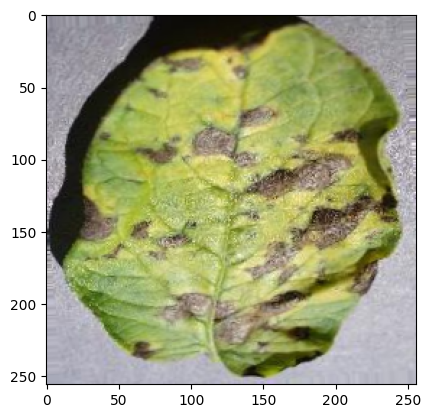

In [46]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


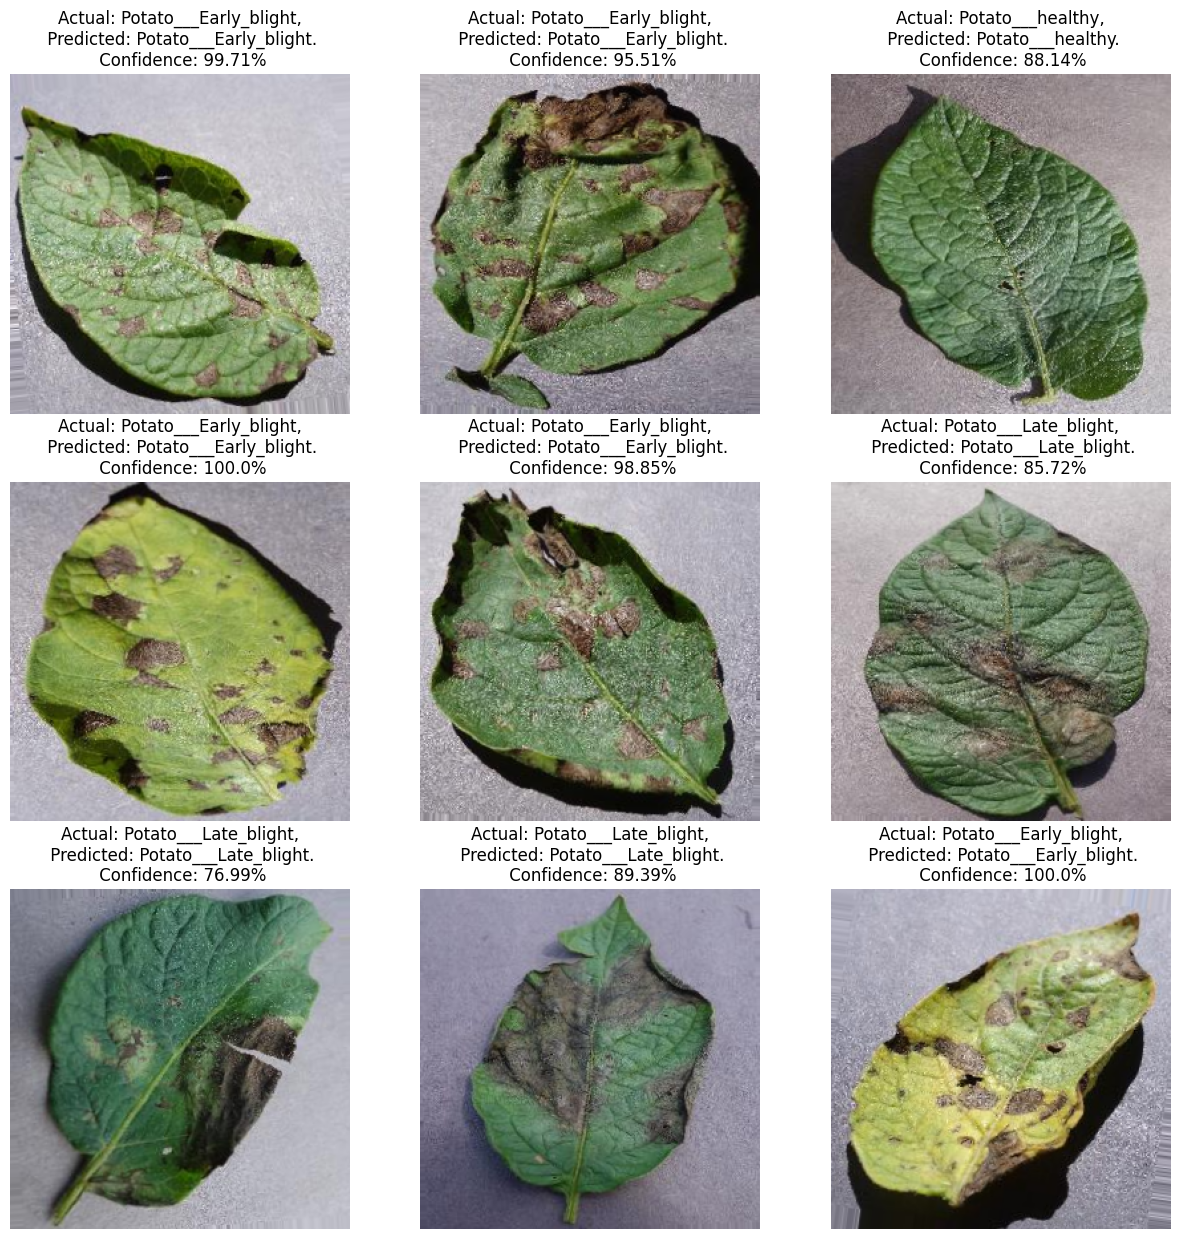

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [49]:
model.save("../potatoes.h5")
# This model will be deployed to gcp